# **1. Описание набора данных, переменных**
## Постановка задачи.

Есть датасет по маркам автомобилям и их продажам. Решим **регерссионную задачу.** Необходимо сделать прогноз по ценам, исходя из данных. Определим целевой признак - **Price**. Для решения задачи применим следующие алгоритмы: **Random Forest**(Случайный лес) и **Градиентый бустинг** 


### Процесс решения задач возникающих в машинном обучении состоит из следующих этапов:

1. Очистка и форматирование данных
2. Предварительный анализ данных
3. Выбор наиболее полезных признаков и создание новых более репрезентативных
4. Сравнение качества работы нескольких моделей
5. Оптимизация гиперпараметров в лучшей модели
6. Проверка модели на тестовой выборке
7. Интерпретация результатов
8. Итоговое представление результатов работы.

О наборе данных.<p>
Эти данные были взяты из сообщений на популярном онлайн-авторынке. Набор данных содержит информацию из каждой публикации, включая такие характеристики, как марка, модель, год выпуска, цвет кузова, трансмиссия и т.д. Если вы хотите увидеть код, используемый для очистки данных, пожалуйста, посетите https://github.com/cvandergeugten/Cars.com-Data-Project/blob/main/car_data_scraper.py

Задача:
Этот набор данных содержит множество категориальных переменных и некоторые переменные, которые необходимо изменить/очистить, прежде чем использовать их для любого типа прогнозного моделирования.

1. Удалим символы из переменной 'price' и преобразуйте ее в целое число. Также удалим все строки, которые имеют значение "не оценено", ИЛИ можно попытаться присвоить соответствующее значение цены на основе марки и модели автомобиля.
2. В столбце "Новое/использованное" есть много различных типов "сертифицированных" значений. Изменим все это, чтобы они отображались как "Сертифицированные". (Объедините все различные сертифицированные значения для конкретной марки в одну сертифицированную категорию)
3. Удалим строки из данных, где значение для 'трансмиссии' равно '-' . Скорее всего, это были случаи, когда продавец не вводил информацию о трансмиссии. 
4. Создайте фиктивные переменные для соответствующих категориальных переменных, чтобы их можно было использовать для прогнозного моделирования.
5. Создадим регрессионную модель, которая предсказывает цену автомобиля.
6. Изучим данные подробнее и посмотрим, что еще вы можно с ними сделать.


Информация о признаках:
- Год выпуска: Год выпуска авто
- Марка: Марка автомобиля
- Модель: Модель автомобиля
- Подержанный /Новый: Является ли продаваемый автомобиль подержанным, новым или сертифицированным.
- Цена: Цена объявления
- Рейтинг потребителей: Средний рейтинг потребителей, основанный на представленных отзывах потребителей
- Отзывы потребителей: Количество отзывов, представленных на автомобиль в списке
- Тип продавца: Является ли продавец дилером или частным лицом
- Имя продавца: Имя продавца
- Название улицы: Название улицы, на которой находится продавец
- Штат: Штат местонахождения продавца
- Почтовый индекс: почтовый индекс местонахождения продавца
- Тип сделки: Насколько хороша сделка, основанная на средней рыночной цене автомобиля в объявлении. (Великий, Хороший, Справедливый, NaN)
- Оценка комфорта: как потребители оценили комфорт автомобиля
- Оценка дизайна интерьера: как потребители оценили дизайн интерьера автомобиля
- Оценка производительности: как потребители оценили производительность автомобиля
- ValueForMoneyRating: как потребители оценили ценность автомобиля по цене
- Оценка экстерьера: как потребители оценили внешний вид автомобиля
- Оценка надежности: как потребители оценили надежность автомобиля
- Цвет экстерьера: цвет кузова автомобиля
- Цвет интерьера: цвет интерьера автомобиля
- Трансмиссия: Тип трансмиссии автомобиля
- MinMPG: Мимнимальные мили на галлон
- MaxMPG: Максимальные мили на галлон
- Тип топлива: Тип топлива, которое использует автомобиль. (Газовый, электрический, Гибридный и т.д.)
- Трансмиссия: Тип трансмиссии
- Двигатель: Название двигателя
- VIN: Номер VIN
- Номер акции : Биржевой номер листинга
- Пробег: Количество миль на автомобиле

#**2. Разведочный анализ и подготовка данных (EDA)**

In [ ]:
!pip install -U dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from dataprep.eda import *
%matplotlib inline


## 2.1. Посмотрим статистическую информацию о данных.

In [ ]:
df_cars = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Модуль 2/Datasets/cars_raw.csv')
df_cars.describe()

,Year,ConsumerRating,ConsumerReviews,SellerRating,SellerReviews,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,MinMPG,MaxMPG,Mileage
count,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000
mean,2018.721719,4.702825,133.187014,4.412571,984.089988,4.771895,4.727391,4.696290,4.537083,4.782194,4.681746,22.755411,29.216548,37463.023350
std,2.221708,0.240795,154.985640,0.626258,1609.039864,0.217822,0.194391,0.253664,0.338098,0.171537,0.368161,14.812869,12.809783,24970.342569
min,2001.000000,2.500000,1.000000,1.000000,1.000000,3.000000,2.800000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,121.000000
25%,2018.000000,4.700000,30.000000,4.300000,112.000000,4.700000,4.700000,4.600000,4.500000,4.700000,4.600000,18.000000,25.000000,18666.500000
50%,2019.000000,4.800000,75.000000,4.600000,542.000000,4.800000,4.800000,4.700000,4.600000,4.800000,4.800000,20.000000,27.000000,32907.000000
75%,2020.000000,4.800000,182.000000,4.800000,1272.000000,4.900000,4.800000,4.800000,4.700000,4.900000,4.900000,24.000000,31.000000,47698.000000
max,2022.000000,5.000000,817.000000,5.000000,27824.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,150.000000,133.000000,234114.000000


In [ ]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9379 entries, 0 to 9378
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9379 non-null   int64  
 1   Make                   9379 non-null   object 
 2   Model                  9379 non-null   object 
 3   Used/New               9379 non-null   object 
 4   Price                  9379 non-null   object 
 5   ConsumerRating         9379 non-null   float64
 6   ConsumerReviews        9379 non-null   int64  
 7   SellerType             9379 non-null   object 
 8   SellerName             9379 non-null   object 
 9   SellerRating           9379 non-null   float64
 10  SellerReviews          9379 non-null   int64  
 11  StreetName             9379 non-null   object 
 12  State                  9379 non-null   object 
 13  Zipcode                9379 non-null   object 
 14  DealType               9157 non-null   object 
 15  Comf

## 2.2. Посмотрим на пропущенные значения в столбцах

In [ ]:
df_cars.isna().sum()

Year                       0
Make                       0
Model                      0
Used/New                   0
Price                      0
ConsumerRating             0
ConsumerReviews            0
SellerType                 0
SellerName                 0
SellerRating               0
SellerReviews              0
StreetName                 0
State                      0
Zipcode                    0
DealType                 222
ComfortRating              0
InteriorDesignRating       0
PerformanceRating          0
ValueForMoneyRating        0
ExteriorStylingRating      0
ReliabilityRating          0
ExteriorColor              0
InteriorColor              0
Drivetrain                 0
MinMPG                     0
MaxMPG                     0
FuelType                   0
Transmission               0
Engine                     0
VIN                        0
Stock#                     0
Mileage                    0
dtype: int64

### Имеется пропуск данных в одном столбце "DealType" и определим процент от общего количество данных с помощью функции:

In [ ]:
def missing_values_table(df_cars):
    mis_val = df_cars.isnull().sum()
    mis_val_percent = 100 * df_cars.isnull().sum() / len(df_cars)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table_ren_columns = mis_val_table.rename(columns =
                {0 : 'Missing Values', 1 : '% of Total Values'})

    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] !=0].sort_values('% of Total Values', ascending=False).round(1)

    print ("Your selected dataframe has " + str(df_cars.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns


In [ ]:
missing_values_table(df_cars)

Your selected dataframe has 32 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
DealType,222,2.4


### 2.4 % от всех данных. Немного, можно было бы удалить, но сначала посмотрим на важность признака по отношению к целевому признаку(Price). Пока лучше заменим отсутствующее значеие на *mode.* 

In [ ]:
df_cars['DealType'].mode() # найдем моду и заменим пропущенное значение модой.

0    Good
dtype: object

In [ ]:
df_cars.fillna({'DealType':'Good'}, inplace=True)

In [ ]:
df_cars.isna().sum()

Year                     0
Make                     0
Model                    0
Used/New                 0
Price                    0
ConsumerRating           0
ConsumerReviews          0
SellerType               0
SellerName               0
SellerRating             0
SellerReviews            0
StreetName               0
State                    0
Zipcode                  0
DealType                 0
ComfortRating            0
InteriorDesignRating     0
PerformanceRating        0
ValueForMoneyRating      0
ExteriorStylingRating    0
ReliabilityRating        0
ExteriorColor            0
InteriorColor            0
Drivetrain               0
MinMPG                   0
MaxMPG                   0
FuelType                 0
Transmission             0
Engine                   0
VIN                      0
Stock#                   0
Mileage                  0
dtype: int64

## 2.3. Для убодства переименуем название колонок.

In [ ]:
df_cars=df_cars.rename(columns={'ComfortRating':'Comf_Rating', 'InteriorDesignRating':'DesignRating', 
                                'PerformanceRating':'Perf_Rating', 'ValueForMoneyRating':'Value_Rating', 
                                'ExteriorStylingRating':'Exter_Rating', 'ReliabilityRating':'Reliability'})


## 2.4. Посмотрим на целевой признак и приведем к формату int64

In [ ]:
df_cars['Price'].head(5)

0    $39,998
1    $49,985
2    $41,860
3    $28,500
4    $49,000
Name: Price, dtype: object

###В столбце **Price** все строки имеют знаки $ и запятые вместо точек через функцию. Также есть отсутствующие значения = 'Not Priced', заменим их на средние значения по столбцу. Поменяем на нормальный тип.

In [ ]:
not_priced = df_cars[df_cars['Price']=='Not Priced'].value_counts()
print(not_priced.head())

Year  Make   Model             Used/New        Price       ConsumerRating  ConsumerReviews  SellerType  SellerName                    SellerRating  SellerReviews  StreetName                            State  Zipcode  DealType  Comf_Rating  DesignRating  Perf_Rating  Value_Rating  Exter_Rating  Reliability  ExteriorColor           InteriorColor  Drivetrain         MinMPG  MaxMPG  FuelType  Transmission       Engine                      VIN                Stock#    Mileage
2019  Honda  Civic Sport       Used            Not Priced  4.9             275              Dealer      Sterling Motorsport           3.6           14             9 Douglas Ct #101 Sterling            VA     20166    Good      4.8          4.8           4.9          4.8           4.9           4.9          White Orchid Pearl      Black          Front-wheel Drive  30      36      Gasoline  Automatic CVT      1.5L I4 16V GDI DOHC Turbo  SHHFK7H40KU411065  S411065   30509      2
      BMW    540 i xDrive      Used        

### Создадим функцию по замене и удалению ненужных символов в ценах, "Not priced" заменим на NaN для дальнейшей замены на среденее значение.

In [ ]:
def clean_price(x):
    if isinstance(x, str):
        return(x.replace('$','').replace(',','.').replace('Not Priced', 'NaN'))
    return(x)

In [ ]:
df_cars['Price'] = df_cars['Price'].apply(clean_price).astype('float')
df_cars['Price'].head()

0    39.998
1    49.985
2    41.860
3    28.500
4    49.000
Name: Price, dtype: float64

### Заменим отсутствующие значения NaN на среднее значение по столбцу

In [ ]:
df_cars['Price'].fillna(df_cars['Price'].mean(), inplace=True)

In [ ]:
df_cars['Price'].head()

0    39.998
1    49.985
2    41.860
3    28.500
4    49.000
Name: Price, dtype: float64

## 2.5. Удаление дубликатов

In [ ]:
duplicated_rows=df_cars[df_cars.duplicated()]
print('Число дублированных строк:',duplicated_rows.shape )


Число дублированных строк: (872, 32)


In [ ]:
df_cars = df_cars.drop_duplicates()


## 2.6. Объединим все различные сертифицированные значения для конкретной марки в одну сертифицированную категорию - 'Certified'

In [ ]:
df_cars['Used/New'].unique()

array(['Used', 'Dodge Certified', 'Acura Certified', 'Honda Certified',
       'Mercedes-Benz Certified', 'Ford Certified', 'Toyota Certified',
       'BMW Certified', 'Porsche Certified', 'Cadillac Certified',
       'Volvo Certified', 'Nissan Certified', 'Subaru Certified',
       'Volkswagen Certified', 'INFINITI Certified',
       'Chevrolet Certified', 'Kia Certified', 'RAM Certified',
       'Jeep Certified', 'GMC Certified', 'Buick Certified',
       'Alfa Romeo Certified', 'Bentley Certified', 'MINI Certified',
       'Ferrari Certified', 'Maserati Certified'], dtype=object)

In [ ]:
def certified(string_to_replace, replacement):
    df_cars['Used/New'].replace({string_to_replace: replacement}, inplace=True)
    

In [ ]:
list_to_replace=['Acura Certified', 'Honda Certified',
       'Mercedes-Benz Certified', 'Ford Certified', 'Toyota Certified',
       'BMW Certified', 'Porsche Certified', 'Cadillac Certified',
       'Volvo Certified', 'Nissan Certified', 'Subaru Certified',
       'Volkswagen Certified', 'INFINITI Certified',
       'Chevrolet Certified', 'Kia Certified', 'RAM Certified',
       'Jeep Certified', 'GMC Certified', 'Buick Certified',
       'Alfa Romeo Certified', 'Dodge Certified', 'Bentley Certified', 'MINI Certified',
       'Ferrari Certified', 'Maserati Certified']
for i in list_to_replace:
    certified(i, 'Certified')

### Проверим уникальные значения

In [ ]:
df_cars['Used/New'].unique()

array(['Used', 'Certified'], dtype=object)

## 2.7. Проверим столбец 'Drivetrain' на уникальность значений.

In [ ]:
df_cars['Drivetrain'].unique()

array(['Front-wheel Drive', 'Four-wheel Drive', 'Rear-wheel Drive',
       'All-wheel Drive', '4WD', 'AWD', 'RWD', 'FWD', 'Front Wheel Drive',
       '–'], dtype=object)

In [ ]:
drive_ = df_cars[df_cars['Drivetrain']=='–'].value_counts()
print(drive_.shape)


(7,)


### Как видим всего 7 строк с незаполненными данными. Можно удалить, т.к. их число незначительно и не повлияет на результат.

In [ ]:
df_cars.drop(df_cars[df_cars['Drivetrain'] == '–'].index, inplace=True )
df_cars['Drivetrain'].unique()

array(['Front-wheel Drive', 'Four-wheel Drive', 'Rear-wheel Drive',
       'All-wheel Drive', '4WD', 'AWD', 'RWD', 'FWD', 'Front Wheel Drive'],
      dtype=object)

### Несколько названий в 'Drivetrain' означают одно значение, например: "4WD" и "Four-wheel drive" означает один и тот же тип привода автомобиля. Заменим их на один. Создадим функцию

In [ ]:
def wheel_drive(str_replace, r):
    df_cars['Drivetrain'].replace({str_replace : r}, inplace=True)
    

In [ ]:
FWD_list = ['Front-wheel Drive', 'Front Wheel Drive']
[wheel_drive(i, 'FWD') for i in FWD_list]


[None, None]

In [ ]:
Four_wheels_list = ['4WD', 'AWD','Four-wheel Drive','All-wheel Drive']
[wheel_drive(i, '4WD') for i in Four_wheels_list]

[None, None, None, None]

In [ ]:
wheel_drive('Rear-wheel Drive','RWD')


In [ ]:
df_cars['Drivetrain'].unique()

array(['FWD', '4WD', 'RWD'], dtype=object)

##2.8. Проверим уникальные значения по признаку 'Transmission'. Необходимо соединить примеры одинаковые по значению.

In [ ]:
df_cars['Transmission'].unique()

array(['8-Speed Automatic', '10-Speed Automatic', 'Automatic CVT',
       '5-Speed Automatic', '7-Speed Automatic', '9-Speed Automatic',
       '6-Speed Automatic', 'Automatic', '6-Speed A/T',
       '7-Speed Automatic with Auto-Shift',
       'Transmission w/Dual Shift Mode', '7-Speed A/T', 'A/T',
       '8-SPEED A/T', '8-Speed Automatic with Auto-Shift', '8-Speed A/T',
       '1-Speed A/T', '9-SPEED A/T', 'driver adaptive 7 speed automatic',
       '6-SPEED A/T', '5-SPEED M/T', '4-Speed Automatic', '6-Speed M/T',
       '8 speed tiptronic s automatic', '1-Speed Automatic',
       'Automatic with Overdrive', 'CVT 7-Speed', 'Automatic 5-Speed',
       '9-Speed A/T', '–', 'CVT', 'Variable', 'sport automatic', 'Manual',
       '6-Speed Automatic with Auto-Shift', '6-Speed Manual',
       '5-SPEED A/T', '6-Speed Automatic with Overdrive', '7-SPEED A/T',
       '9g tronic automatic', '5-Speed Manual', 'Automatic 6-Speed',
       '1 speed automatic', 'CVT Lineartronic', '10-Speed A/T',
    

In [ ]:
def trans(x):
    if 'AUTOMATIC' in x or 'Automatic' in x or 'automatic' in x or 'CVT' in x or 'cvt' in x or 'variable' in x or 'Auto' in x or 'auto' in x or 'A/T' in x:
        return 'Automatic'
    if 'M/T' in x or 'manual' in x or 'Manual' in x or 'Dual Shift' in x or 'Double-clutch' in x or 'PDK' in x:
        return 'Manual'
    else:
        return 'Automatic'

In [ ]:
df_cars['Transmission'] = df_cars['Transmission'].apply(trans)
df_cars['Transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

## 2.9. Проверим уникальные значения по признаку "Engine". Их много, через функцию соединим двигатели одинаковой мощности("Capacity"). Приведем в нормальный вид, без лишних симоволов. Приведем тип к float

In [ ]:
df_cars['Engine'].unique()

array(['3.5L V6 24V PDI DOHC', '3.5L V6 24V PDI DOHC Twin Turbo',
       '5.7L V8 16V MPFI OHV', '1.5L I4 16V GDI DOHC Turbo',
       '4.0L V6 24V MPFI DOHC', '1.8L I4 16V MPFI SOHC',
       '3.5L V6 24V GDI DOHC', '3.5L V6 24V GDI SOHC',
       '6.4L V8 16V MPFI OHV', '3.5L V6 24V MPFI DOHC',
       '2.0L H4 16V GDI DOHC', 'Regular Unleaded V-6 3.5 L/213',
       '2.3L I4 16V GDI DOHC Turbo', '2.0L I4 16V GDI DOHC Turbo',
       '2.5L H4 16V GDI DOHC', '3.0L I6 24V GDI DOHC Turbo',
       '248.0HP 3.5L V6 Cylinder Engine Gasoline Fuel',
       '2.4L H4 16V GDI DOHC Turbo',
       '240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
       '3.6L V6 24V GDI DOHC',
       '328.0HP 3.7L V6 Cylinder Engine Gasoline Fuel',
       '382.0HP Electric Motor Electric Fuel System',
       'Regular Unleaded V-6 3.5 L/212', 'Straight 6 Cylinder Engine',
       '2.4L I4 16V GDI DOHC', '3.6L V6 24V MPFI DOHC',
       '380.0HP 3.0L V6 Cylinder Engine Gasoline Fuel',
       '5.0L V8 32V GDI DOHC Supercharge

In [ ]:
df_cars['Cap'] = df_cars['Engine'].str.findall(r'[0-9].[0-9]L') + df_cars['Engine'].str.findall(r'[0-9].[0-9] L')
df_cars['Cap'] = df_cars['Cap'].apply(lambda x : '0.0' if len(x) == 0 else ' '.join(x)).str.replace(' ','').str.replace('L','')
df_cars['Cap'] = df_cars['Cap'].astype(float)

In [ ]:
df_cars['Cap'].nunique()

44

### Всего осталось только 44 уникальных значения. Переименуем столбец и удалим лишние колонки. 

In [ ]:
def test(x):
    if x == 0.0:
        return np.nan
    else:
        return x
df_cars['Capacity'] = df_cars['Cap'].apply(test).fillna(df_cars['Cap'].mean()).apply(lambda x:
                                                                      round(x,1))

### Удалим 2 лишние столбцы.

In [ ]:
df_cars.drop(['Cap','Engine'], axis = 1, inplace = True)

In [ ]:
df_cars['Capacity'].unique()

array([3.5, 5.7, 1.5, 4. , 1.8, 6.4, 2. , 2.3, 2.5, 3. , 2.4, 3.6, 3.7,
       2.8, 5. , 4.6, 6.2, 1.4, 5.3, 4.4, 2.7, 4.3, 2.9, 3.8, 3.4, 3.3,
       5.5, 4.7, 5.6, 3.2, 5.4, 1.6, 4.2, 6.6, 1.2, 6.5, 6. , 4.8, 4.5,
       3.9, 1. , 1.3, 6.3, 5.2])

##2.10. Удалим строки имеющие отстутсвующие значения '–' в столбце "FuelType".

In [ ]:
df_cars['FuelType'].unique()

array(['Gasoline', 'Gasoline Fuel', 'Electric Fuel System',
       'E85 Flex Fuel', 'Electric', 'Hybrid', 'Plug-In Electric/Gas', '–',
       'Flex Fuel Capability', 'Diesel', 'Diesel Fuel',
       'Gasoline/Mild Electric Hybrid', 'Flexible Fuel'], dtype=object)

In [ ]:
df_cars.drop(df_cars[df_cars['FuelType']=='–'].index, inplace=True)

### Объединим одинаковые по значению типы топлива. Прмиеним функцию

In [ ]:
def fuel(x):
    if x == 'Gasoline' or x=='Gasoline Fuel':
        return 'Gasoline'
    elif x == 'Electric Fuel System' or x == 'Electric':
        return 'Electric'
    elif x == 'Flexible Fuel' or x == 'E85 Flex Fuel':
        return 'Flex'
    else:
        return "Hybrid"
df_cars['Fuel'] = df_cars['FuelType'].apply(fuel) 


In [ ]:
df_cars.drop('FuelType', axis = 1, inplace = True)

In [ ]:
df_cars['Fuel'].value_counts()

Gasoline    8096
Electric     148
Hybrid       115
Flex         112
Name: Fuel, dtype: int64

## 2.11. Удалим незначащие колонки, номер рынка, VIN-номер, название улицы, имя продавца и внутренний цвет автомобиля. 

In [ ]:
df_cars.drop(['Stock#','VIN', 'StreetName','SellerName','InteriorColor','Zipcode', 'ExteriorColor','Model', 'State'],
             axis = 1, inplace=True)

In [ ]:
df_cars['Make'].unique()

array(['Toyota', 'Ford', 'RAM', 'Honda', 'Lexus', 'Mercedes-Benz',
       'Dodge', 'Subaru', 'Acura', 'BMW', 'Audi', 'Volvo', 'Lincoln',
       'Land', 'Chevrolet', 'INFINITI', 'Tesla', 'Jeep', 'Chrysler',
       'Mazda', 'Kia', 'Volkswagen', 'Porsche', 'Nissan', 'Hyundai',
       'GMC', 'Buick', 'Genesis', 'Cadillac', 'Alfa', 'FIAT', 'Jaguar',
       'MINI', 'Lamborghini', 'Maserati', 'Mitsubishi', 'Bentley',
       'Mercury', 'Scion', 'Saturn', 'Ferrari'], dtype=object)

##2.12. Колонки со значениями минимальной и максимальной скорости 'MinMPG' и 'MaxMPG' содержат нули. Их можно заполнить средним значением по колонке.

In [ ]:
print(df_cars['MaxMPG'].unique())

[ 27  24  21  35  23  34  30  26  28  22  33  29  31  25  40   0  19  32
  36  77  39  38  37  20  17  18 114 117 107  44 106  41 124  48 105 112
 126  66  50  93  14  42  15 102  73  16 116  99 127  90  86  94  87  43
  45  84 108  68  47  95  80 123  89]


In [ ]:
df_cars['MinMPG'].unique()

array([ 19,  15,  29,  20,  17,  28,  21,  16,  26,  27,  22,  23,  18,
        31,   0,  13,  24,  25,  30,  14,  80, 127, 131, 118,  40, 115,
        34, 140,  35,  51, 102, 120,  43,  36,  41, 134,  12,  66,  54,
        99,  32, 101,  74, 116,  10, 124,  78, 123, 141,  89, 100,  11,
        90, 110, 128,  42, 119,  76,  44, 132,  67,  33,  91,  79, 105,
       136,  86])

In [ ]:
#df_cars.loc[(df_cars['MaxMPG'] == 0), 'MaxMPG'] = df_cars['MaxMPG'].mean()

In [ ]:
#df_cars['MaxMPG'] = np.where(df_cars['MaxMPG'] == 0, df_cars['MaxMPG'].mean(), df_cars['MaxMPG'])

In [ ]:
df_cars['MaxMPG'].where(~(df_cars['MaxMPG'] == 0), other = df_cars['MaxMPG'].mean(), inplace=True)

In [ ]:
df_cars['MinMPG'].where(~(df_cars['MinMPG']==0), other = df_cars['MinMPG'].mean(), inplace=True)


# **3. Очистка данных**

##3.1. Построим матрицу корреляции.

In [ ]:
corr = df_cars.corr()
px.imshow(corr, text_auto=True, aspect='auto')

### Как видим между признаками "ConsumerRating", "Comf_Rating", "DesignRating", "Perf_Rating", "Value_Rating", "Exter_Rating", "Reliability" высокая корреляция. Поэтому не целесообразно все эти признаки подавать на обучение модели. Удалим 6 из них. Оставим только "ConsumerRating". Также "MinMPG" и "MaxMPG" довольно высокая корреляция. Создадим новый признак - среднюю скорость "AvgMPG" и удалим "MinMPG" и "MaxMPG".

In [ ]:
df_cars['AvgMPG'] = (df_cars['MaxMPG'] + df_cars['MinMPG'])/2
df_cars.drop(['MaxMPG', 'MinMPG'], axis=1, inplace=True)

In [ ]:
df_cars.columns

Index(['Year', 'Make', 'Used/New', 'Price', 'ConsumerRating',
       'ConsumerReviews', 'SellerType', 'SellerRating', 'SellerReviews',
       'DealType', 'Comf_Rating', 'DesignRating', 'Perf_Rating',
       'Value_Rating', 'Exter_Rating', 'Reliability', 'Drivetrain',
       'Transmission', 'Mileage', 'Capacity', 'Fuel', 'AvgMPG'],
      dtype='object')

In [ ]:
df_cars.drop(["Comf_Rating", "DesignRating", "Perf_Rating", "Value_Rating", "Exter_Rating", "Reliability",], axis=1, inplace=True)


##3.2. Чтобы не заполонять признаковую матрицу кучей бинарных признаков(используя "one-hot-encoded"), применим кодировку OrdinalEncoder.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [ ]:
df_cars["Make_code"] = enc.fit_transform(df_cars[["Make"]])
df_cars.drop(['Make'], axis=1, inplace=True)

In [ ]:
df_cars["Make_code"].head()

0    38.0
1    12.0
2    33.0
3    15.0
4    23.0
Name: Make_code, dtype: float64

### Далее определим категориальные признаки и переведём в числовые с помощью функции **pd.get_dummies()**. Применим **.drop_first** - чтобы избежать мультиколлениарности.

In [ ]:
df_categ=df_cars.select_dtypes(include=['object'])
df_categ.columns

Index(['Used/New', 'SellerType', 'DealType', 'Drivetrain', 'Transmission',
       'Fuel'],
      dtype='object')

In [ ]:
categ_list = ['Used/New', 'SellerType', 'DealType',
   'Drivetrain', 'Transmission', 'Fuel']

In [ ]:
df_cars = pd.get_dummies(df_cars, columns=categ_list,drop_first=False)

##3.3. Построим графики scatterplot зависимости целевого признака "Price" с некоторыми признаками.

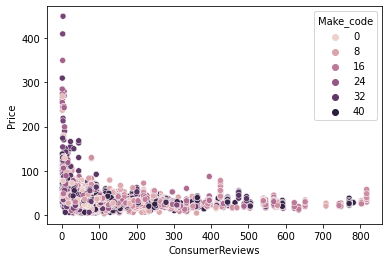

In [ ]:
sns.scatterplot(x='ConsumerReviews', y = 'Price', data=df_cars, hue='Make_code')
plt.show()

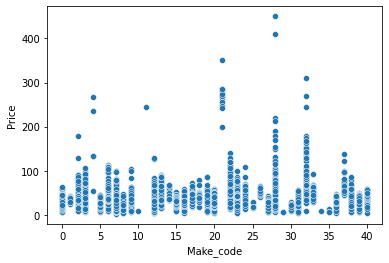

In [ ]:
sns.scatterplot(x='Make_code', y = 'Price', data=df_cars)
plt.show()

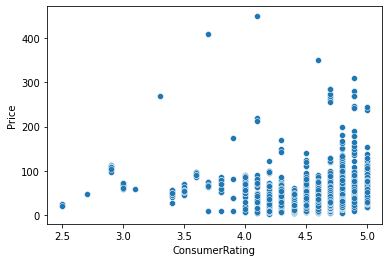

In [ ]:
sns.scatterplot(x='ConsumerRating', y = 'Price', data=df_cars)
plt.show()

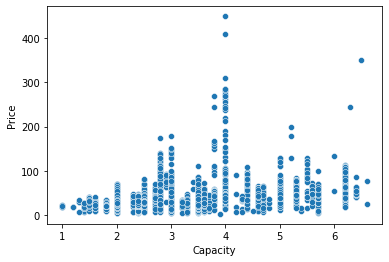

In [ ]:
sns.scatterplot(x='Capacity', y = 'Price', data=df_cars)
plt.show()

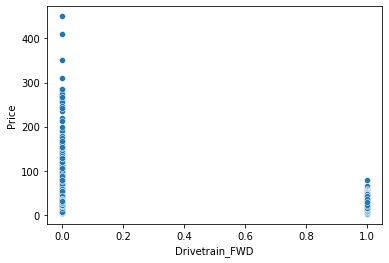

In [ ]:
sns.scatterplot(x='Drivetrain_FWD', y = 'Price', data=df_cars)
plt.show()

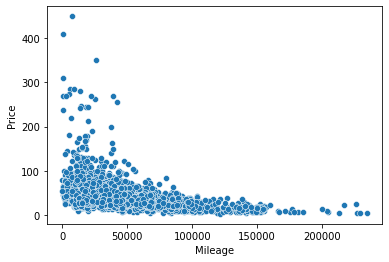

In [ ]:
sns.scatterplot(x='Mileage', y = 'Price', data=df_cars)
plt.show()

### Как видим есть явная корреляция между целевым и числовыим признаками.

## 3.4. Еще раз посмотрим на матрицу корреляцию.

In [ ]:
corr = df_cars.corr()
px.imshow(corr, text_auto=True, aspect='auto')

### По матрице видно, что также много коррелириующих признаков. Нужно удалить признаки с высокой корреляцией.

In [ ]:
df_cars = df_cars.drop(['DealType_Good', 'Drivetrain_4WD', 'Transmission_Manual', 'Used/New_Used', 
                        'Fuel_Flex', 'Fuel_Hybrid', 'Fuel_Electric', 'SellerType_Private', 'Year'], axis=1)

### Проверим еще раз входные данные на мультиколлениарность: 

In [ ]:
corr2 = df_cars.corr()
px.imshow(corr2, text_auto=True, aspect='auto')

### Видим, что между признаками коллениарности нет.


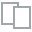
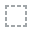
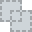
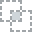
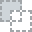
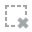
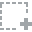
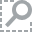
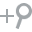
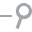
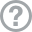
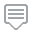
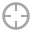
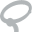
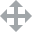
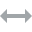
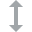
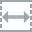
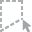
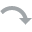
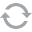
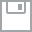
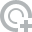
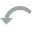
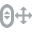
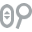
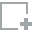
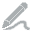
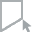
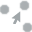
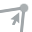
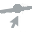

In [ ]:
plot_correlation(df_cars)

##3.5. Сохраним датасет для дальнейшей работы с алгоритмами.

In [ ]:
df_cars.to_csv('car_sales.csv')

# **4. Моделирование** 

### Далее импортируем необходимые библиотеки и определим обучающие и тестовые выборки. И проведем обучение модели на и Градиентном бустинге, Линейной Регрессии, Random Forest


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

### Разделим данные на обучающую и тестовую выборку.

In [ ]:
x = df_cars.drop(['Price'], axis =1)
y = df_cars['Price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(5929, 16) (2542, 16) (5929,) (2542,)


### Проведем обучение и посмтрим на основные метрики качества

In [ ]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred=lm.predict(x_test)

In [ ]:
print('Точность линейной регресии: ')
cross_val = cross_val_score(estimator=lm, X=x_train, y=y_train, cv=4, verbose=0)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_absolute_error(y_test, y_pred)**0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Cross val: ', cross_val)
print('R2       : ', r2)
print('MAE      :', mae)
print('MSE(RMSE):', mse, '(',rmse,')')

Точность линейной регресии: 
Cross val:  [0.37661854 0.30153907 0.36928587 0.42006091]
R2       :  0.3652053208199062
MAE      : 9.022818765473257
MSE(RMSE): 259.55364970761235 ( 3.003800720000123 )


###  R2 – очень важный показатель, который используется для оценки производительности модели машинного обучения на основе регрессии. Суть его работы заключается в измерении количества отклонений в прогнозах, объясненных набором данных. Проще говоря, это разница между выборками в наборе данных и прогнозами, сделанными моделью.

### В приведенном выше коде обучил модель машинного обучения с помощью алгоритма линейной регрессии, а затем вычислил ее результат в квадрате. Показатель модели R2, обученной здесь, составили 0.36, что является низким показателем. Если значение оценки R в квадрате равно 1, это означает, что модель идеальна, а если ее значение равно 0, это означает, что модель будет плохо работать с неизвестным набором данных. Это также означает, что чем ближе значение оценки R в квадрате к 1, тем точнее обучается модель.

### - Коэффициент MAE показывает среднее абсолютное отклонение предсказанных значений от реальных, то насколько в среднем ошибается модель. Чем выше значение MAE, тем модель хуже. У линейной регресии высокйи показатель 9.02.
### - MSE показывает средний квадрат отклонений предсказанных значений от реальных. Чем выше значение MSE, тем модель хуже. У Random Forest высокий показатель 259.5.

### Проведем обучение модели на других алгоритмах. 

In [ ]:
param_df = pd.DataFrame({"Features" : ['intercept'] + list(x_train.columns),
                         "Coef" : [lm.intercept_] + list(lm.coef_)})
cols =  param_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
param_df = param_df[cols]
print(param_df)

         Coef                Features
0   79.871015               intercept
1   -8.790154          ConsumerRating
2   -0.023670         ConsumerReviews
3    0.593367            SellerRating
4   -0.000254           SellerReviews
5   -0.000310                 Mileage
6    5.905133                Capacity
7    0.045496                  AvgMPG
8    0.028408               Make_code
9    1.469374      Used/New_Certified
10   5.504846       SellerType_Dealer
11   5.260761           DealType_Fair
12  -4.855652          DealType_Great
13  -9.569298          Drivetrain_FWD
14  -3.559630          Drivetrain_RWD
15  -3.115119  Transmission_Automatic
16  -4.979831           Fuel_Gasoline


### Видим, что больше всего на цену автомобилей оказыват влияние  SellerType_Dealer (Тип продавца), Capacity(Мощность автомобиля), Drivetrain_FWD(Переднеприводные автомобили) и др.

### Преобразуем данные в один числовой диапозон с помощью **MinMaxScaler**

In [ ]:
min_macsaler = preprocessing.MinMaxScaler()
scaled_minmax = min_macsaler.fit_transform(x_train)
scaled_minmax_df = pd.DataFrame(scaled_minmax, columns = x.columns)
scaled_minmax_df

,ConsumerRating,ConsumerReviews,SellerRating,SellerReviews,Mileage,Capacity,AvgMPG,Make_code,Used/New_Certified,SellerType_Dealer,DealType_Fair,DealType_Great,Drivetrain_FWD,Drivetrain_RWD,Transmission_Automatic,Fuel_Gasoline
0,0.88,0.018382,0.875,0.000467,0.046756,0.178571,0.103306,0.700,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,0.88,0.123775,0.900,0.006398,0.181786,0.446429,0.070248,0.375,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.92,0.660539,0.950,0.076340,0.052259,0.089286,0.140496,0.375,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.88,0.080882,1.000,0.000000,0.064951,0.178571,0.095041,0.175,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
4,0.92,0.015931,1.000,0.000000,0.065087,0.178571,0.128099,0.050,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5924,0.96,0.013480,0.975,0.096754,0.126490,0.446429,0.090909,0.575,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
5925,0.92,0.075980,0.900,0.048557,0.070932,0.446429,0.086777,0.375,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
5926,0.92,0.245098,0.950,0.085828,0.232444,0.357143,0.070248,0.825,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5927,0.84,0.252451,0.925,0.003199,0.248846,0.464286,0.070248,0.325,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


### Рекурсивное удаление неважныех признаков с помощью перекрестной проверки, посмотрим на них, и проведем обучение на этих признаках.

In [ ]:

rfecv = RFECV(estimator=GradientBoostingRegressor(), step=1, cv=10)
rfecv.fit(scaled_minmax_df, y_train)
#RFECV(cv=10, estimator=LinearRegression())

RFECV(cv=10, estimator=GradientBoostingRegressor())

In [ ]:
print('Оптимальное количество признаков:%d'%rfecv.n_features_)

Оптимальное количество признаков:10


### Рекурсивное удаление признаков с кросс-валидацией выявило 9 основных признаков, которые влияют на целевой признак. Далее будем использовать эти признаки для обучения наших моделей.

In [ ]:
selected_features = list(np.array(x.columns)[rfecv.support_])
selected_features

['ConsumerRating',
 'ConsumerReviews',
 'SellerRating',
 'SellerReviews',
 'Mileage',
 'Capacity',
 'AvgMPG',
 'Make_code',
 'DealType_Great',
 'Drivetrain_FWD']

In [ ]:
x_train_new = x_train.values[:, rfecv.support_]
x_test_new = x_test.values[:, rfecv.support_]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning:

The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.



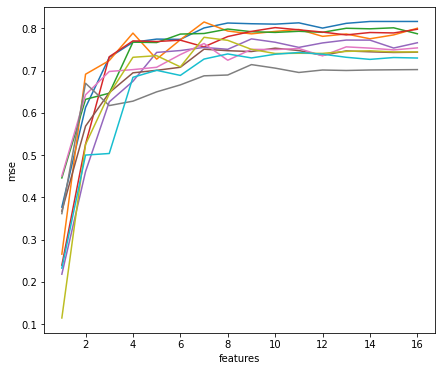

In [ ]:
plt.figure(figsize=(6*1.168,6))
plt.xlabel('features')
plt.ylabel('mse')
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)

### Посмотрим на точность предсказаний на оставшихся 9 признаках

In [ ]:
lm2 = LinearRegression()
lm2.fit(x_train, y_train)
y_pred2=lm2.predict(x_test)

In [ ]:
print('Точность линейной регресии на 9 признаках: ')
cross_val = cross_val_score(estimator=lm2, X=x_train_new, y=y_train, cv=5, verbose=0)
mse = mean_squared_error(y_test, y_pred2)
rmse = mean_absolute_error(y_test, y_pred2)**0.5
mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print('Cross val: ', cross_val)
print('R2       : ', r2)
print('MAE      :', mae)
print('MSE(RMSE):', mse, '(',rmse,')')

Точность линейной регресии на 9 признаках: 
Cross val:  [0.36015151 0.2799884  0.3685727  0.3834413  0.39845957]
R2       :  0.3652053208199062
MAE      : 9.022818765473257
MSE(RMSE): 259.55364970761235 ( 3.003800720000123 )


### Как видим коэффициент R2 и другие показатели не изменились, остались практически те же самые. Нужно улучшать модель.

# **4.2. RandomForest**.

### Проведем обучение модели на Random Forest, просмотрим на коэффициент корреляции и среднеквадратическую ошибку. 

In [ ]:
from sklearn.metrics import r2_score


rf = RandomForestRegressor(random_state=1234)
# также можно изменить параметры:
#rf = RandomForestRegressor(n_estimators = 10, max_depth=4, min_samples_split = 2, random_state=1234)

rf.fit(x_train, y_train)
y_pred3 = rf.predict(x_test) 


In [ ]:
print('Точность Random Forest: ')
cross_val = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=5, verbose=0)
mse = mean_squared_error(y_test, y_pred3)
rmse = mean_absolute_error(y_test, y_pred3)**0.5
mae = mean_absolute_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)

print('Cross val: ', cross_val)
print('R2       : ', r2)
print('MAE      :', mae)
print('MSE(RMSE):', mse, '(',rmse,')')

Точность Random Forest: 
Cross val:  [0.82786714 0.77143818 0.80954918 0.7883959  0.81005544]
R2       :  0.7874508168641707
MAE      : 4.52185142958667
MSE(RMSE): 86.90670863298905 ( 2.1264645375803166 )


### - Коэффициент R2 показывает высокий уровень - 0.78. 

### - Коэффициент MAE показывает среднее абсолютное отклонение предсказанных значений от реальных, то насколько в среднем ошибается модель. Чем выше значение MAE, тем модель хуже. У Random Forest невысокйи показатель 4.5.

### - MSE показывает средний квадрат отклонений предсказанных значений от реальных. Чем выше значение MSE, тем модель хуже. У Random Forest невысокйи показатель 86.9

# **4.3. Gradient Boosting**
### Проведем обучение модели с помощью Градиентного бустинга

In [ ]:
x, y = make_regression(random_state=0)
gb = GradientBoostingRegressor(random_state=1234)
gb.fit(x_train, y_train)

y_pred4 = gb.predict(x_test)


In [ ]:
print('Точность Gradient Boosting Regressor: ')
cross_val = cross_val_score(estimator = gb, X = x_train, y = y_train, cv = 4,verbose = 0)
mse = mean_squared_error(y_test, y_pred4)
rmse = mean_squared_error(y_test, y_pred4)**0.5
mae = mean_absolute_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)

print('Cross val: ', cross_val)
print('R2       : ', r2)
print('MAE      :', mae)
print('MSE(RMSE):', mse, '(',rmse,')')

Точность Gradient Boosting Regressor: 
Cross val:  [0.78927271 0.77776586 0.71899234 0.73036403]
R2       :  0.7335761882696692
MAE      : 5.971783251171589
MSE(RMSE): 108.93486503846808 ( 10.437186643845557 )


### - Коэффициент R2 у Gradient Boosting показывает высокий уровень - 0.73.
###- Коэффициент MAE показывает среднее абсолютное отклонение предсказанных значений от реальных, то насколько в среднем ошибается модель. Чем выше значение MAE, тем модель хуже. У Gradient Boosting показатель 5.9, что выше предыдущей.
###- MSE показывает средний квадрат отклонений предсказанных значений от реальных. Чем выше значение MSE, тем модель хуже. У Gradient Boosting  показатель 108.9



# Результаты обучений трех моделей по показателю R2:


In [ ]:
r2 = r2_score(y_test, y_pred2)
print('Показатель коэффициента R2 Линейной регрессии: ', r2)
r2 = r2_score(y_test, y_pred3)
print('Показатель коэффициента R2 Random Forest     : ', r2)
r2 = r2_score(y_test, y_pred4)
print('Показатель коэффициента R2 Gradient Boosting : ', r2)

Показатель коэффициента R2 Линейной регрессии:  0.3652053208199062
Показатель коэффициента R2 Random Forest     :  0.7874508168641707
Показатель коэффициента R2 Gradient Boosting :  0.7335761882696692


###**4.4. Вывод: Как видим, прогноз модели Random Forest показал лучшую точность - R2 0.78. Т.о., 78% изменчивости зависимого выходного атрибута можно объяснить нашей моделью.**